In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [10]:
data = pd.read_csv('dados.csv', index_col=0)
data = data.dropna()

In [11]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [12]:
data.shape

(333, 8)

In [19]:
data.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


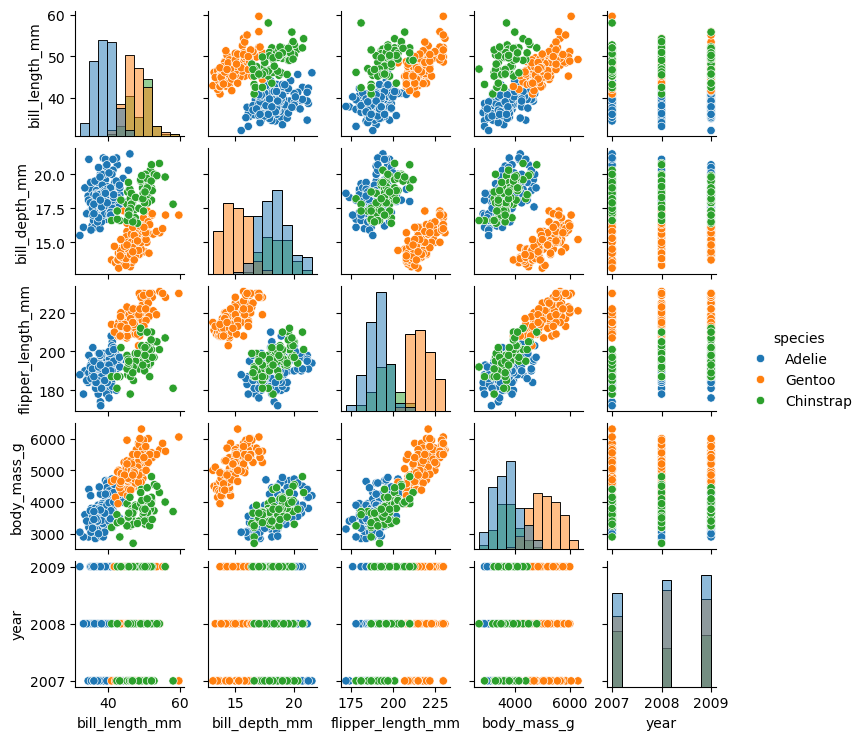

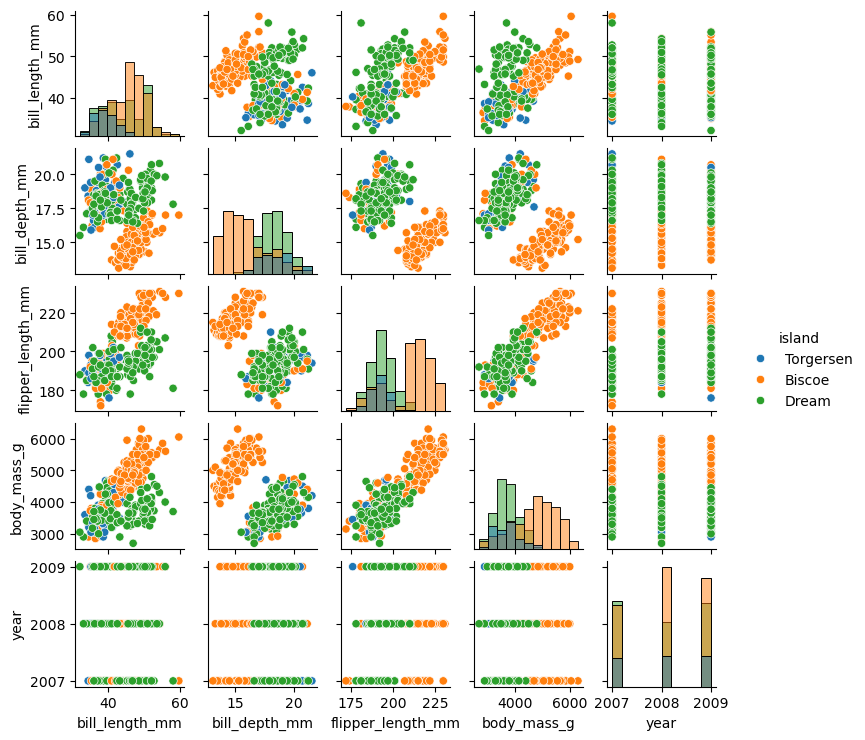

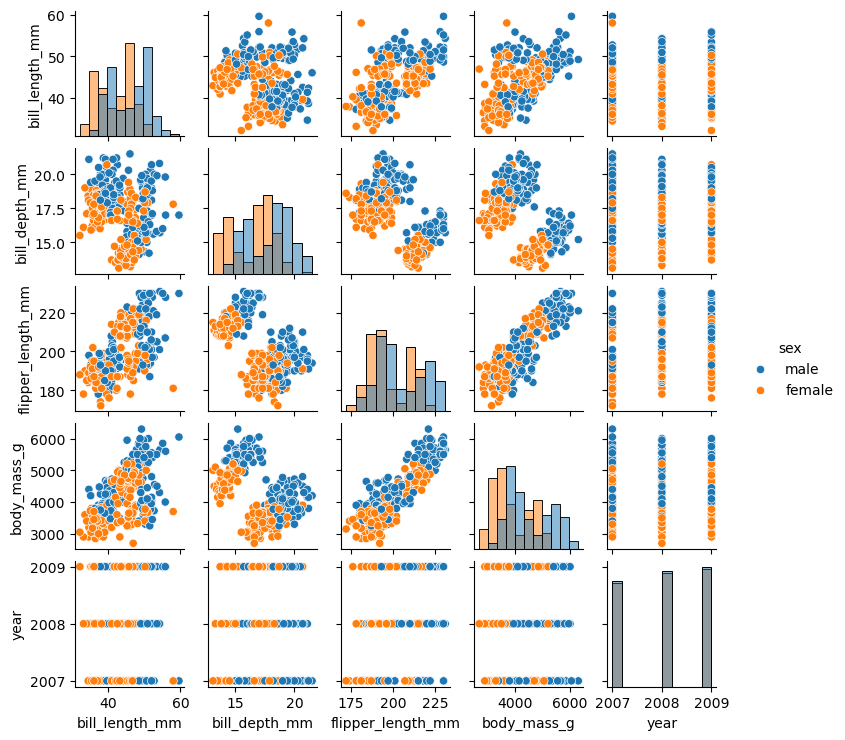

In [108]:
sns.pairplot(data, hue="species", height= 1.5, diag_kind="hist")
sns.pairplot(data, hue="island", height= 1.5, diag_kind="hist")
sns.pairplot(data, hue="sex", height= 1.5, diag_kind="hist")

plt.show()

<Axes: >

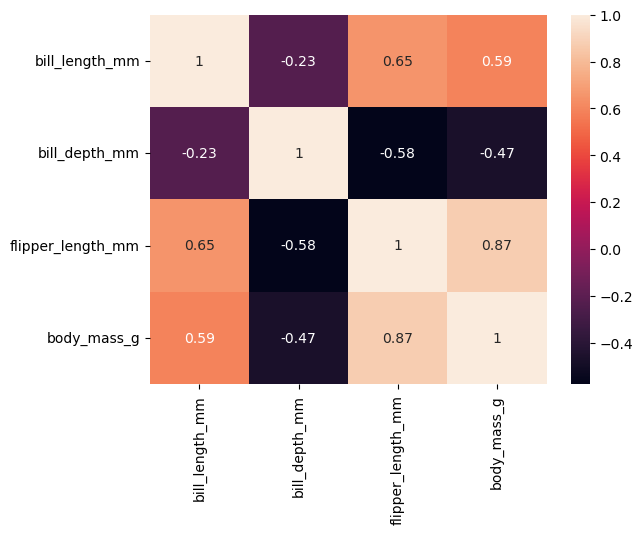

In [119]:
cor = data[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']].corr()
sns.heatmap(cor, annot= True)

In [145]:
modelo = smf.ols(data= data, formula= 'body_mass_g ~ bill_depth_mm + flipper_length_mm + bill_length_mm*species').fit()

In [144]:
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     262.4
Date:                Thu, 16 Nov 2023   Prob (F-statistic):          8.94e-143
Time:                        15:09:01   Log-Likelihood:                -2347.5
No. Observations:                 333   AIC:                             4715.
Df Residuals:                     323   BIC:                             4753.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [146]:
residuals = modelo.resid 
fitted_value = modelo.fittedvalues 
stand_resids = modelo.resid_pearson 
influence = modelo.get_influence() 
leverage = influence.hat_matrix_diag 

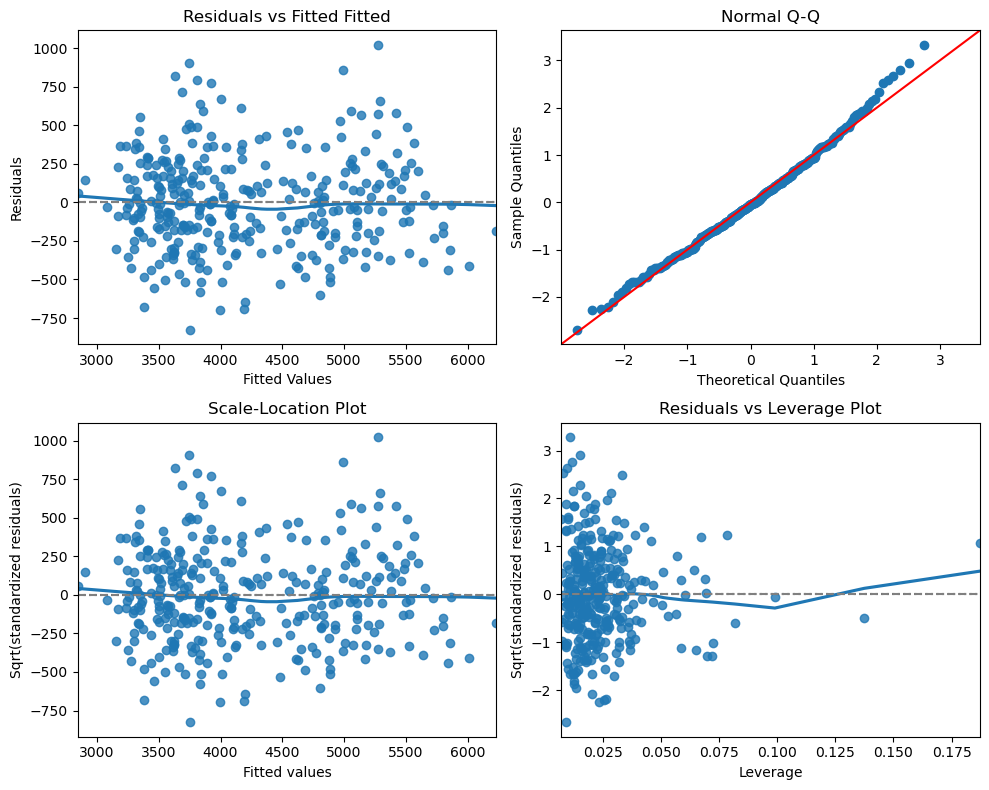

In [150]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize= (10, 8)) 
  
# Residual vs Fitted Plot 
sns.residplot(x=fitted_value, y=residuals, ax=ax[0, 0], lowess= True) 
ax[0, 0].axhline(y=0, color='grey', linestyle='dashed') 
ax[0, 0].set_xlabel('Fitted Values') 
ax[0, 0].set_ylabel('Residuals') 
ax[0, 0].set_title('Residuals vs Fitted Fitted') 
  
# Normal Q-Q plot 
sm.qqplot(residuals, fit=True, line='45',ax=ax[0, 1]) 
ax[0, 1].set_title('Normal Q-Q') 
  
# Scale-Location Plot 
sns.residplot(x=fitted_value, y=residuals, ax=ax[1, 0], lowess= True) 
ax[1, 0].axhline(y=0, color='grey', linestyle='dashed') 
ax[1, 0].set_xlabel('Fitted values') 
ax[1, 0].set_ylabel('Sqrt(standardized residuals)') 
ax[1, 0].set_title('Scale-Location Plot') 
  
# Residual vs Leverage Plot 
sns.residplot(x=leverage, y=stand_resids, ax=ax[1, 1], lowess= True) 
ax[1, 1].axhline(y=0, color='grey', linestyle='dashed') 
ax[1, 1].set_xlabel('Leverage') 
ax[1, 1].set_ylabel('Sqrt(standardized residuals)') 
ax[1, 1].set_title('Residuals vs Leverage Plot') 
  
  
plt.tight_layout() 
plt.show() 

In [179]:
influence_df = influence.summary_frame()
influence_df[(influence_df > 1).all(axis= 1)]

,dfb_Intercept,dfb_species[T.Chinstrap],dfb_species[T.Gentoo],dfb_bill_depth_mm,dfb_flipper_length_mm,dfb_bill_length_mm,dfb_bill_length_mm:species[T.Chinstrap],dfb_bill_length_mm:species[T.Gentoo],cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
